In [1]:
### This file is for reading in massachusetts the census data csv (2000+ columns)
### And making meaningful dataframes from select variables

### Rename columns and subset.
### sum and average into massachusetts cities...
### conver to per capita values

In [19]:
# correlation plots - https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
#


In [3]:
### Read in the census csv
ma_census = pd.read_csv('~/Desktop/new_insights/datasets/census/massachusetts_census_data.csv', dtype={'Zipcode':str}, index_col = False)

In [4]:
### Pull relevant variables (i.e. columns) from the 2000+ column .csv
census = ma_census[['Zipcode', 'Total Population', 'Area (Land)', 
                    'Total Population: Male', 'Total Population: Female',
                    'Total Population: Under 5 Years', 'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years', 'Total Population: 15 to 17 Years',
                    'Total Population: 18 to 24 Years', 'Total Population: 25 to 34 Years', 'Total Population: 35 to 44 Years', 'Total Population: 45 to 54 Years', 'Total Population: 55 to 64 Years', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over',
                    'Population 25 Years and Over:', 'Population 25 Years and Over: Less than High School', 'Population 25 Years and Over: High School Graduate (Includes Equivalency)', 'Population 25 Years and Over: Some College', "Population 25 Years and Over: Bachelor's Degree", "Population 25 Years and Over: Master's Degree", 'Population 25 Years and Over: Professional School Degree', 'Population 25 Years and Over: Doctorate Degree',
                    'In Labor Force 16 Years and Over: Civilian', 'Civilian Population in Labor Force 16 Years and Over: Employed', 'Civilian Population in Labor Force 16 Years and Over: Unemployed',
                    'Households:','Households: Less than $10,000', 'Households: $10,000 to $14,999', 'Households: $15,000 to $19,999', 'Households: $20,000 to $24,999', 'Households: $25,000 to $29,999', 'Households: $30,000 to $34,999', 'Households: $35,000 to $39,999', 'Households: $40,000 to $44,999', 'Households: $45,000 to $49,999', 'Households: $50,000 to $59,999', 'Households: $60,000 to $74,999', 'Households: $75,000 to $99,999', 'Households: $100,000 to $124,999', 'Households: $125,000 to $149,999', 'Households: $150,000 to $199,999', 'Households: $200,000 or More',
                    'Average Family Income (In 2017 Inflation Adjusted Dollars)', 'Average Nonfamily Income (In 2017 Inflation Adjusted Dollars)',
                   ]]

In [5]:
### Look at the column headers
census.columns

Index(['Zipcode', 'Total Population', 'Area (Land)', 'Total Population: Male',
       'Total Population: Female', 'Total Population: Under 5 Years',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       'Total Population: 15 to 17 Years', 'Total Population: 18 to 24 Years',
       'Total Population: 25 to 34 Years', 'Total Population: 35 to 44 Years',
       'Total Population: 45 to 54 Years', 'Total Population: 55 to 64 Years',
       'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years',
       'Total Population: 85 Years and Over', 'Population 25 Years and Over:',
       'Population 25 Years and Over: Less than High School',
       'Population 25 Years and Over: High School Graduate (Includes Equivalency)',
       'Population 25 Years and Over: Some College',
       'Population 25 Years and Over: Bachelor's Degree',
       'Population 25 Years and Over: Master's Degree',
       'Population 25 Years and Over: Professional School Degree',

In [6]:
### Clean up some of the column formatting
census.columns = census.columns.str.replace('$','')
census.columns = census.columns.str.replace(',','')
census.columns = census.columns.str.replace('Less than','<')
census.columns = census.columns.str.replace("'","")
census.columns = census.columns.str.replace('200000 or More', '> 200000')
census.columns = census.columns.str.replace("In 2017 Inflation Adjusted Dollars", '')
census.columns = census.columns.str.replace("(", '')
census.columns = census.columns.str.replace(")", '')
census.columns = census.columns.str.replace('Income ', 'Income')
census.columns

Index(['Zipcode', 'Total Population', 'Area Land', 'Total Population: Male',
       'Total Population: Female', 'Total Population: Under 5 Years',
       'Total Population: 5 to 9 Years', 'Total Population: 10 to 14 Years',
       'Total Population: 15 to 17 Years', 'Total Population: 18 to 24 Years',
       'Total Population: 25 to 34 Years', 'Total Population: 35 to 44 Years',
       'Total Population: 45 to 54 Years', 'Total Population: 55 to 64 Years',
       'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years',
       'Total Population: 85 Years and Over', 'Population 25 Years and Over:',
       'Population 25 Years and Over: < High School',
       'Population 25 Years and Over: High School Graduate Includes Equivalency',
       'Population 25 Years and Over: Some College',
       'Population 25 Years and Over: Bachelors Degree',
       'Population 25 Years and Over: Masters Degree',
       'Population 25 Years and Over: Professional School Degree',
       'Popul

In [8]:
census.head()

,Zipcode,Total Population,Area Land,Total Population: Male,Total Population: Female,Total Population: Under 5 Years,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Total Population: 15 to 17 Years,Total Population: 18 to 24 Years,...,Households: 45000 to 49999,Households: 50000 to 59999,Households: 60000 to 74999,Households: 75000 to 99999,Households: 100000 to 124999,Households: 125000 to 149999,Households: 150000 to 199999,Households: > 200000,Average Family Income,Average Nonfamily Income
0,01001,17537,11.442319,8211,9326,845,832,945,613,944,...,354,757,782,825,709,617,440,238,92424.12346,47462.17009
1,01002,30280,55.041324,14881,15399,902,1089,1108,753,12641,...,272,621,585,1106,783,531,787,792,117077.88250,41813.89056
2,01005,5014,44.242253,2581,2433,136,241,387,323,429,...,107,153,185,183,215,92,196,150,120235.15480,54197.23435
3,01007,14906,52.643487,7265,7641,702,998,881,770,1493,...,198,337,422,881,763,543,578,459,112889.26770,76329.07394
4,01008,1272,53.796184,674,598,54,32,57,49,88,...,16,52,100,59,86,21,15,35,82574.56359,58219.72789


# Import Zipcode Dictionary, Attach Cities

In [9]:
zipcode_dictionary = pd.read_csv('~/Desktop/new_insights/data_files/final_zipcode_dictionary.csv', dtype={'Zipcode':str}, index_col = False)
zipcode_dictionary.head()

,Zipcode,City,County
0,01001,Agawam,Hampden
1,01002,Amherst,Hampshire
2,01005,Barre,Worcester
3,01007,Belchertown,Hampshire
4,01008,Blandford,Hampden


### Roll the zipcodes into cities

In [10]:
def cities_merge_and_sum(column, zipcode_dictionary, zipcode_dataset):
    merged = pd.merge(zipcode_dictionary, zipcode_dataset, on="Zipcode")
    
    cols=[i for i in merged.columns if i not in ["Zipcode","City","County"]]
    for col in cols:
        merged[col]=pd.to_numeric(merged[col])

    City = []
    Value = []
    
    for x in sorted(list(set(zipcode_dictionary['City']))):
        City.append(x)
        Value.append(merged[merged['City']==x][column].sum())
    return City, Value

###

def cities_merge_and_average(column, zipcode_dictionary, zipcode_dataset):
    merged = pd.merge(zipcode_dictionary, zipcode_dataset, on="Zipcode")
    
    cols=[i for i in merged.columns if i not in ["Zipcode","City","County"]]
    for col in cols:
        merged[col]=pd.to_numeric(merged[col])

    City = []
    Value = []
    
    for x in sorted(list(set(zipcode_dictionary['City']))):
        City.append(x)
        Value.append(merged[merged['City']==x][column].mean())
    return City, Value

# Where...
# column: 'column_of_interest'
# zipcode_dictionary: dataframe; make sure column for zipcode = 'zipcode'
# zipcode_dataset: dataframe; make sure column for zipcode = 'zipcode'

# and returns two lists:
# (1) the cities, and
# (2) sum of the 'column_of_interest' for a all cities zipcode dinctionary

In [11]:
cities_merge_and_sum('Total Population', zipcode_dictionary, census)

(['Abington',
  'Acton',
  'Acushnet',
  'Adams',
  'Agawam',
  'Amesbury',
  'Amherst',
  'Andover',
  'Arlington',
  'Ashburnham',
  'Ashby',
  'Ashland',
  'Attleboro',
  'Auburn',
  'Avon',
  'Ayer',
  'Barnstable',
  'Barre',
  'Bedford',
  'Belchertown',
  'Bellingham',
  'Belmont',
  'Berkley',
  'Berlin',
  'Beverly',
  'Billerica',
  'Blackstone',
  'Blandford',
  'Bolton',
  'Boston',
  'Bourne',
  'Boxborough',
  'Boxford',
  'Boylston',
  'Braintree',
  'Brewster',
  'Bridgewater',
  'Brimfield',
  'Brockton',
  'Brookfield',
  'Brookline',
  'Burlington',
  'Cambridge',
  'Canton',
  'Carlisle',
  'Carver',
  'Charlton',
  'Chatham',
  'Chelmsford',
  'Chelsea',
  'Cheshire',
  'Chester',
  'Chesterfield',
  'Chicopee',
  'Clinton',
  'Cohasset',
  'Concord',
  'Conway',
  'Cummington',
  'Dalton',
  'Danvers',
  'Dartmouth',
  'Dedham',
  'Deerfield',
  'Dennis',
  'Dighton',
  'Douglas',
  'Dover',
  'Dracut',
  'Dudley',
  'Dunstable',
  'Duxbury',
  'East Bridgewater',

In [12]:
census_sum = census.drop(columns = ['Average Family Income', 'Average Nonfamily Income'])
census_avg = census[['Zipcode','Average Family Income', 'Average Nonfamily Income']]
census_sum.head()

,Zipcode,Total Population,Area Land,Total Population: Male,Total Population: Female,Total Population: Under 5 Years,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Total Population: 15 to 17 Years,Total Population: 18 to 24 Years,...,Households: 35000 to 39999,Households: 40000 to 44999,Households: 45000 to 49999,Households: 50000 to 59999,Households: 60000 to 74999,Households: 75000 to 99999,Households: 100000 to 124999,Households: 125000 to 149999,Households: 150000 to 199999,Households: > 200000
0,01001,17537,11.442319,8211,9326,845,832,945,613,944,...,350,282,354,757,782,825,709,617,440,238
1,01002,30280,55.041324,14881,15399,902,1089,1108,753,12641,...,476,299,272,621,585,1106,783,531,787,792
2,01005,5014,44.242253,2581,2433,136,241,387,323,429,...,82,75,107,153,185,183,215,92,196,150
3,01007,14906,52.643487,7265,7641,702,998,881,770,1493,...,140,138,198,337,422,881,763,543,578,459
4,01008,1272,53.796184,674,598,54,32,57,49,88,...,20,36,16,52,100,59,86,21,15,35


In [30]:
newDF = pd.DataFrame() #creates a new dataframe that's empty

In [31]:
newDF = pd.DataFrame() #creates a new dataframe that's empty

counter = 0
zipcode_dataset = census_sum


for column in zipcode_dataset.columns:

    if column != 'Zipcode':
        #print(counter)
        City, Value = cities_merge_and_sum(column, zipcode_dictionary, zipcode_dataset)
        if counter == 0:
            newDF['City'] = City
            newDF[column] = Value
            counter +=1
        else:
            newDF[column] = Value
            counter += 1

KeyboardInterrupt: 

In [14]:
newDF_sum = newDF

In [15]:
newDF = pd.DataFrame() #creates a new dataframe that's empty

counter = 0
zipcode_dataset = census_avg

for column in zipcode_dataset.columns:

    if column != 'Zipcode':
        #print(counter)
        City, Value = cities_merge_and_average(column, zipcode_dictionary, zipcode_dataset)
        if counter == 0:
            newDF['City'] = City
            newDF[column] = Value
            counter +=1
        else:
            newDF[column] = Value
            counter += 1

In [16]:
newDF_avg = newDF

In [17]:
city_census = pd.merge(newDF_sum, newDF_avg, on = "City")
city_census

,City,Total Population,Area Land,Total Population: Male,Total Population: Female,Total Population: Under 5 Years,Total Population: 5 to 9 Years,Total Population: 10 to 14 Years,Total Population: 15 to 17 Years,Total Population: 18 to 24 Years,...,Households: 45000 to 49999,Households: 50000 to 59999,Households: 60000 to 74999,Households: 75000 to 99999,Households: 100000 to 124999,Households: 125000 to 149999,Households: 150000 to 199999,Households: > 200000,Average Family Income,Average Nonfamily Income
0,Abington,16275,9.655306,7557,8718,902,891,932,478,1695,...,324,344,514,937,955,684,695,394,116902.263100,59284.940780
1,Acton,23396,19.760085,11755,11641,1060,1383,2156,1234,1461,...,174,368,476,755,908,928,1228,2516,176263.541700,65472.676060
2,Acushnet,10443,18.426888,5145,5298,504,642,323,373,966,...,208,265,527,542,433,430,330,108,92449.394250,52256.993010
3,Adams,8211,24.590591,4170,4041,395,307,464,382,568,...,211,249,498,415,331,196,122,63,77903.766820,37761.378410
4,Agawam,28748,23.309801,13748,15000,1397,1445,1585,1242,1716,...,464,1166,1159,1337,1173,954,959,458,95993.877055,45233.887940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Woburn,40375,12.652351,20028,20347,2142,1977,2110,1408,3234,...,316,1360,1397,2298,1952,1516,1660,1252,115725.710600,66100.198090
299,Worcester,185257,37.851470,90785,94472,10612,9477,10060,6227,28144,...,2569,5050,6609,7539,5421,3280,3006,2527,75011.147324,43500.582161
300,Worthington,1186,31.351768,550,636,30,42,60,30,125,...,18,30,68,98,67,44,29,45,115487.828900,55315.873020
301,Wrentham,11597,21.706216,5622,5975,809,645,950,528,883,...,78,160,338,445,399,396,637,744,165198.736800,66138.580750


In [21]:
city_census.to_csv('~/Desktop/new_insights/data_files/massachusetts_city_census_data.csv', index = False)

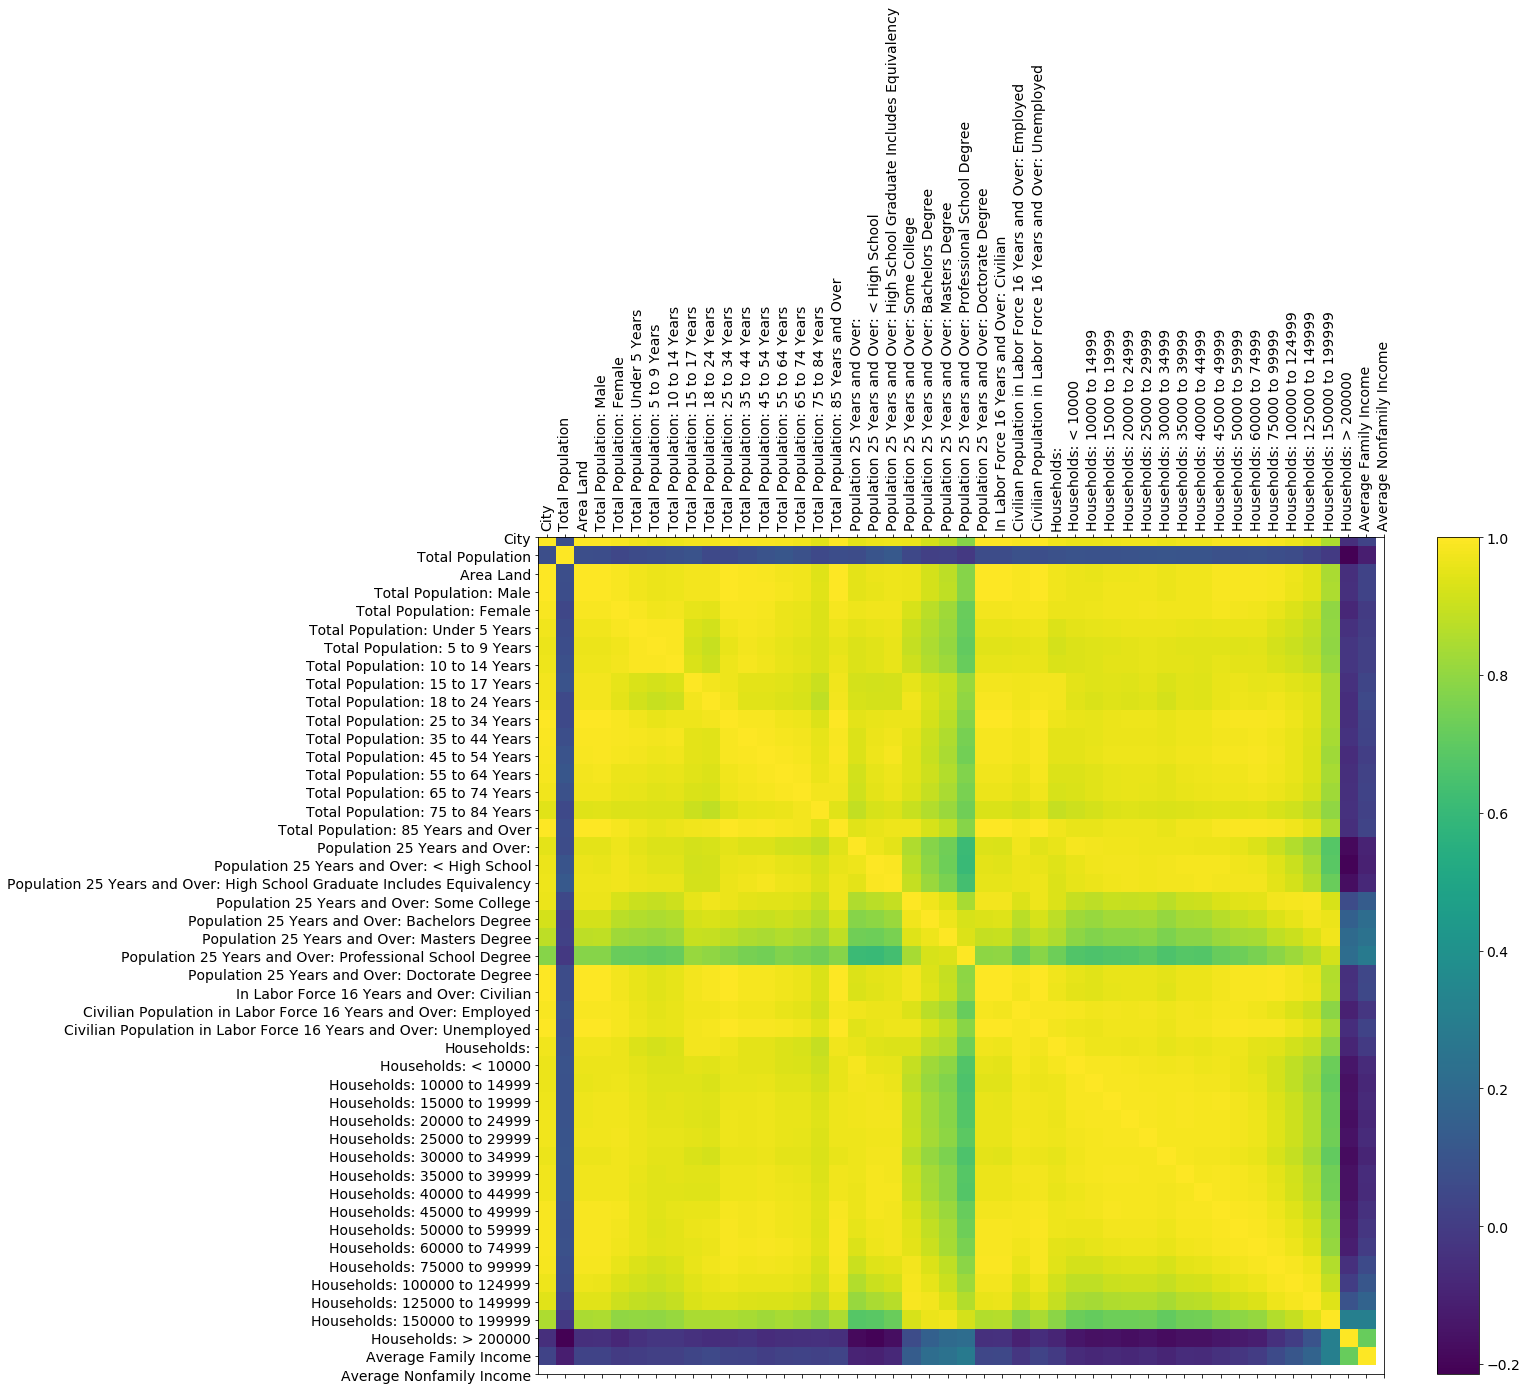

In [20]:
df = city_census
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cmap = 'jet'
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

In [21]:
### Create an empty dataframe call census feature engineer (censusFE)
censusFE = pd.DataFrame()

In [22]:
censusFE

""


### Convert counts to per capita...
### Lets move this later in the pipeline?


In [27]:

### Create an empty dataframe call census feature engineer (censusFE)
censusFE = pd.DataFrame()

### Keep City and Population
censusFE['City'] = city_census['City']
censusFE['Population'] = city_census['Total Population']

### Convert Population Male / Female to Percentage
censusFE['Percent Male'] = city_census['Total Population: Male'] / city_census['Total Population']
censusFE['Percent Female'] = city_census['Total Population: Female'] / city_census['Total Population']

### Convert Bins of Age Counts to Percentage of Total Population in Age Bin
censusFE['Percent Age 5-9'] = city_census['Total Population: 5 to 9 Years'] / city_census['Total Population']
censusFE['Percent Age 10-14'] = city_census['Total Population: 10 to 14 Years'] / city_census['Total Population']
censusFE['Percent Age 15-17'] = city_census['Total Population: 15 to 17 Years'] / city_census['Total Population']
censusFE['Percent Age 18-24'] = city_census['Total Population: 18 to 24 Years'] / city_census['Total Population']
censusFE['Percent Age 25-34'] = city_census['Total Population: 25 to 34 Years'] / city_census['Total Population']
censusFE['Percent Age 35-44'] = city_census['Total Population: 35 to 44 Years'] / city_census['Total Population']
censusFE['Percent Age 45-54'] = city_census['Total Population: 45 to 54 Years'] / city_census['Total Population']
censusFE['Percent Age 55-64'] = city_census['Total Population: 55 to 64 Years'] / city_census['Total Population']
censusFE['Percent Age 65-74'] = city_census['Total Population: 65 to 74 Years'] / city_census['Total Population']
censusFE['Percent Age 75-84'] = city_census['Total Population: 75 to 84 Years'] / city_census['Total Population']
censusFE['Percent Age >85'] = city_census['Total Population: 85 Years and Over'] / city_census['Total Population']

### Convert Bins of Education to Percentage of Total Population in Education Bin (no dublicate degrees; e.g. BA + MS = MS)
censusFE['Percent Edu <High School'] = city_census['Population 25 Years and Over: < High School'] / city_census['Population 25 Years and Over:']
censusFE['Percent Edu High School'] = city_census['Population 25 Years and Over: High School Graduate Includes Equivalency'] / city_census['Population 25 Years and Over:']
censusFE['Percent Edu Bachelors'] = city_census['Population 25 Years and Over: Bachelors Degree'] / city_census['Population 25 Years and Over:']
censusFE['Percent Edu Masters'] = city_census['Population 25 Years and Over: Masters Degree'] / city_census['Population 25 Years and Over:']
censusFE['Percent Edu Progessional School'] = city_census['Population 25 Years and Over: Professional School Degree'] / city_census['Population 25 Years and Over:']
censusFE['Percent Edu Doctorate'] = city_census['Population 25 Years and Over: Doctorate Degree'] / city_census['Population 25 Years and Over:']

### Convert Number Employed / Unemployed to Percentages
censusFE['Percent Employed'] = city_census['Civilian Population in Labor Force 16 Years and Over: Employed'] / city_census['In Labor Force 16 Years and Over: Civilian']
censusFE['Percent Unemployed'] = city_census['Civilian Population in Labor Force 16 Years and Over: Unemployed'] / city_census['In Labor Force 16 Years and Over: Civilian']

### Convert Bins of Household Income Counts to Percentage of Total Population in Income Bin
censusFE['Household Income <10k'] = city_census['Households: < 10000'] / city_census['Households:']
censusFE['Household Income 10-14k'] = city_census['Households: 10000 to 14999'] / city_census['Households:']
censusFE['Household Income 15-19k'] = city_census['Households: 15000 to 19999'] / city_census['Households:']
censusFE['Household Income 20-24k'] = city_census['Households: 20000 to 24999'] / city_census['Households:']
censusFE['Household Income 25-29k'] = city_census['Households: 25000 to 29999'] / city_census['Households:']
censusFE['Household Income 30-34k'] = city_census['Households: 30000 to 34999'] / city_census['Households:']
censusFE['Household Income 35-39k'] = city_census['Households: 35000 to 39999'] / city_census['Households:']
censusFE['Household Income 40-44k'] = city_census['Households: 40000 to 44999'] / city_census['Households:']
censusFE['Household Income 45-49k'] = city_census['Households: 45000 to 49999'] / city_census['Households:']
censusFE['Household Income 50-59k'] = city_census['Households: 50000 to 59999'] / city_census['Households:']
censusFE['Household Income 60-74k'] = city_census['Households: 60000 to 74999'] / city_census['Households:']
censusFE['Household Income 75-99k'] = city_census['Households: 75000 to 99999'] / city_census['Households:']
censusFE['Household Income 100-124k'] = city_census['Households: 100000 to 124999'] / city_census['Households:']
censusFE['Household Income 125-149k'] = city_census['Households: 125000 to 149999'] / city_census['Households:']
censusFE['Household Income 150-199k'] = city_census['Households: 150000 to 199999'] / city_census['Households:']
censusFE['Household Income >200k'] = city_census['Households: > 200000'] / city_census['Households:']

### Keep Average Income As Is
censusFE['Mean Family Income'] = city_census['Average Family Income']
censusFE['Mean Nonfamily Income'] = city_census['Average Nonfamily Income']

In [28]:
censusFE.head()

,City,Population,Percent Male,Percent Female,Percent Age 5-9,Percent Age 10-14,Percent Age 15-17,Percent Age 18-24,Percent Age 25-34,Percent Age 35-44,...,Household Income 45-49k,Household Income 50-59k,Household Income 60-74k,Household Income 75-99k,Household Income 100-124k,Household Income 125-149k,Household Income 150-199k,Household Income >200k,Mean Family Income,Mean Nonfamily Income
0,Abington,16275,0.464332,0.535668,0.054747,0.057266,0.029370,0.104147,0.130200,0.129524,...,0.051956,0.055164,0.082425,0.150257,0.153143,0.109686,0.111450,0.063182,116902.263100,59284.94078
1,Acton,23396,0.502436,0.497564,0.059113,0.092153,0.052744,0.062447,0.072833,0.142546,...,0.019963,0.042221,0.054612,0.086622,0.104176,0.106471,0.140890,0.288665,176263.541700,65472.67606
2,Acushnet,10443,0.492675,0.507325,0.061477,0.030930,0.035718,0.092502,0.110122,0.109739,...,0.051575,0.065708,0.130672,0.134391,0.107364,0.106620,0.081825,0.026779,92449.394250,52256.99301
3,Adams,8211,0.507855,0.492145,0.037389,0.056510,0.046523,0.069175,0.126172,0.109122,...,0.055998,0.066083,0.132166,0.110138,0.087845,0.052017,0.032378,0.016720,77903.766820,37761.37841
4,Agawam,28748,0.478225,0.521775,0.050264,0.055134,0.043203,0.059691,0.111451,0.123417,...,0.039489,0.099234,0.098638,0.113787,0.099830,0.081191,0.081617,0.038979,95993.877055,45233.88794


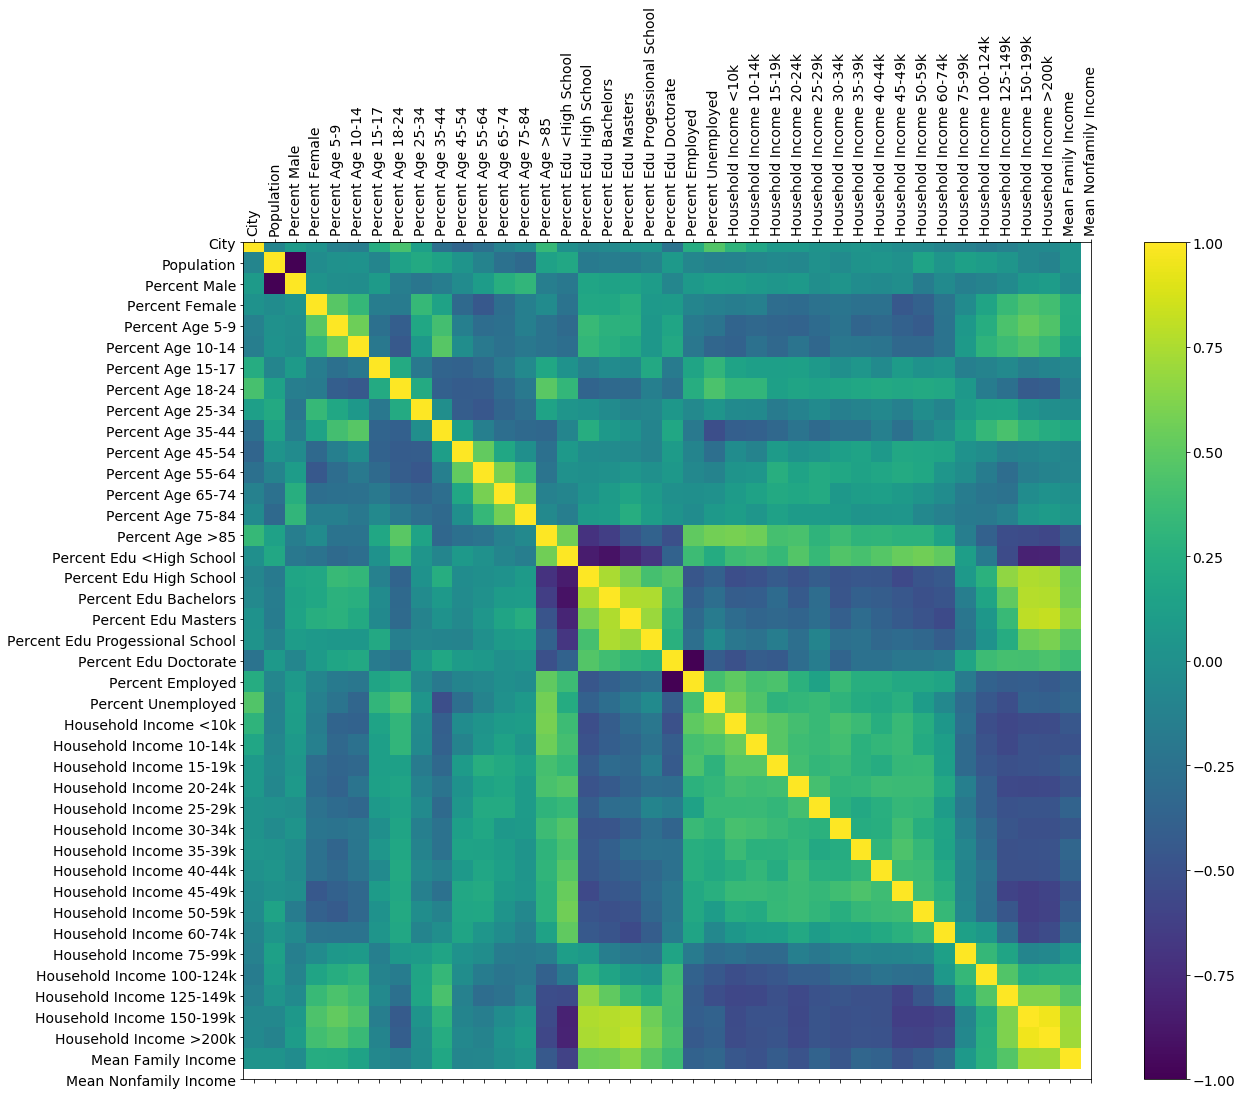

In [29]:
df = censusFE
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cmap = 'jet'
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16);

### Write out the MA census FE dataset

In [ ]:
censusFE.to_csv("~/Desktop/new_insights/datasets/census/massachusetts_census_demographic_features.csv", index = False)